<h1 align="center">Student Performance Prediction

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shree1992\\\\housedata")

print("Path to dataset files:", path)

100%|██████████| 432k/432k [00:00<00:00, 658kB/s]

Extracting files...
Path to dataset files: C:\Users\KOVVO\.cache\kagglehub\datasets\shree1992\housedata\versions\2


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
import morethemes as mt
import pandas as pd
mt.set_theme("ft")
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [110]:
data = pd.read_csv("C:\\Users\\KOVVO\\.cache\\kagglehub\\datasets\\shree1992\\housedata\\versions\\2")
print(data.shape)
data.head()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\KOVVO\\.cache\\kagglehub\\datasets\\shree1992\\housedata\\versions\\2'

In [103]:
duplicates = data[data.duplicated()]# Check for duplicates in the 'data' DataFrame
data = data.drop_duplicates()# Remove duplicates from data
data.shape

(505, 1)

In [104]:
data.isnull().sum()

0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

In [105]:
data.drop_duplicates()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [106]:
data = data.drop("StudentID",axis=1)

KeyError: "['StudentID'] not found in axis"

In [ ]:
features = data.iloc[:, :-1]
features

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [ ]:
corr = data.corr()
corr

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


In [ ]:
sns.heatmap(corr)

<Axes: >

In [ ]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
X = data.iloc[:, :-1]
X

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [ ]:
y = data["GradeClass"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

5.163660014792631


In [ ]:
print(lm.coef_)

[-1.55281314e-04 -5.48519152e-03  4.19274865e-02 -6.05683492e-03
  1.05985831e-02 -1.12943171e-03  6.27196274e-03  1.27928230e-02
  1.07300415e-02  2.16321511e-02  5.67140907e-02  5.07124495e-02
  5.22556830e-02 -1.00736515e+00]


In [ ]:
pred = lm.predict(X_test)

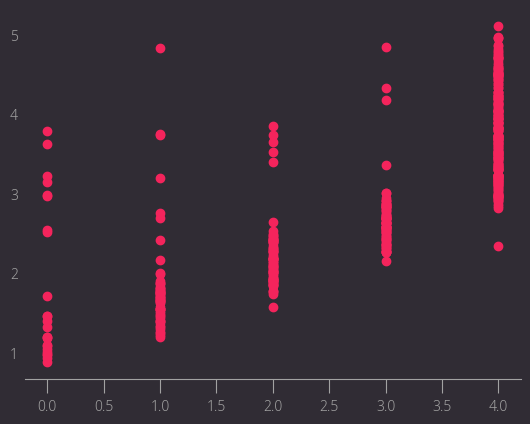

In [ ]:
plt.scatter(y_test,pred)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [ ]:
from sklearn.